In [1]:
import pandas as pd
from dv_setup import dv
# calling this function creates a new file called district_coincident_index.csv
    # The file an updated version from the FRED database for the coincident index by district
    # May take a minute or so to run
dv()

In [2]:
coincident_index = pd.read_csv('district_coincident_index.csv')
coincident_index.tail()

,Date,District 1,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12
540,2024-01-01,151.756468,135.267687,133.214968,132.902900,153.109499,159.764484,132.737206,139.792442,151.126081,150.989240,167.910096,164.907144
541,2024-02-01,152.353069,135.705497,133.460195,133.103360,153.324797,160.160642,133.075488,140.113849,151.367213,151.280710,168.705504,165.088152
542,2024-03-01,152.630953,136.216799,133.749106,133.191030,153.710495,160.486928,133.344483,140.500051,151.722303,151.586405,168.933475,165.523335
543,2024-04-01,153.050333,136.805610,134.044006,133.129018,154.120665,160.782991,133.634318,140.679372,152.214425,151.897011,169.482045,165.979933
544,2024-05-01,153.102654,137.192328,134.430234,133.094065,154.430976,161.227288,133.763292,140.785836,152.206214,152.083103,170.176425,166.634491


In [3]:
coincident_index.head()
# Note some values are missing in first three months of 1979
    # Creates very weird values in District 11 (and less so in others)
    # Does not have TX or LA data for first three months so weight is just based on NM


,Date,District 1,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12
0,1979-01-01,47.217870,55.123685,56.793278,61.616530,31.750346,41.795612,53.230457,55.297280,45.834170,28.893395,2.335777,34.104089
1,1979-02-01,47.409200,55.307339,56.859154,61.701623,31.813583,41.921544,53.352867,55.416696,45.840304,28.992295,2.339315,34.246321
2,1979-03-01,47.667526,55.502879,56.972831,61.792285,31.911743,42.060857,53.454679,55.536572,45.920402,29.119942,2.341589,34.425104
3,1979-04-01,47.900159,55.594819,57.070585,61.736540,45.072839,42.169186,60.915231,55.580960,50.287295,48.134330,38.784881,39.213842
4,1979-05-01,48.121113,55.717994,57.223670,61.859061,45.224476,42.326049,61.035113,55.643169,50.454008,48.279032,38.958457,39.377670


In [4]:
# Drop rows before 1979-03-01
coincident_index = coincident_index[coincident_index['Date'] > '1979-03-01']
coincident_index.head()


,Date,District 1,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12
3,1979-04-01,47.900159,55.594819,57.070585,61.736540,45.072839,42.169186,60.915231,55.580960,50.287295,48.134330,38.784881,39.213842
4,1979-05-01,48.121113,55.717994,57.223670,61.859061,45.224476,42.326049,61.035113,55.643169,50.454008,48.279032,38.958457,39.377670
5,1979-06-01,48.348521,55.823101,57.357131,61.941937,45.325756,42.420375,61.067291,55.670697,50.543305,48.366222,39.111764,39.556305
6,1979-07-01,48.438813,55.824213,57.378873,61.878790,45.430709,42.467473,60.990049,55.571576,50.553708,48.434782,39.261346,39.706408
7,1979-08-01,48.641845,55.902560,57.380464,61.882551,45.472891,42.605177,60.803214,55.518330,50.557205,48.515894,39.416677,39.790623


In [5]:
# Export to csv
coincident_index.to_csv('district_coincident_index.csv', index=False)

In [5]:
import pandas as pd

# Calculate growth rate of each column in the coincident index
coincident_index_change = pd.read_csv('district_coincident_index.csv')
coincident_index_change = coincident_index_change.set_index('Date')
coincident_index_change = coincident_index_change.pct_change()
coincident_index_change = coincident_index_change.reset_index()

# Export to csv
coincident_index_change.to_csv('district_coincident_index_change.csv', index=False)

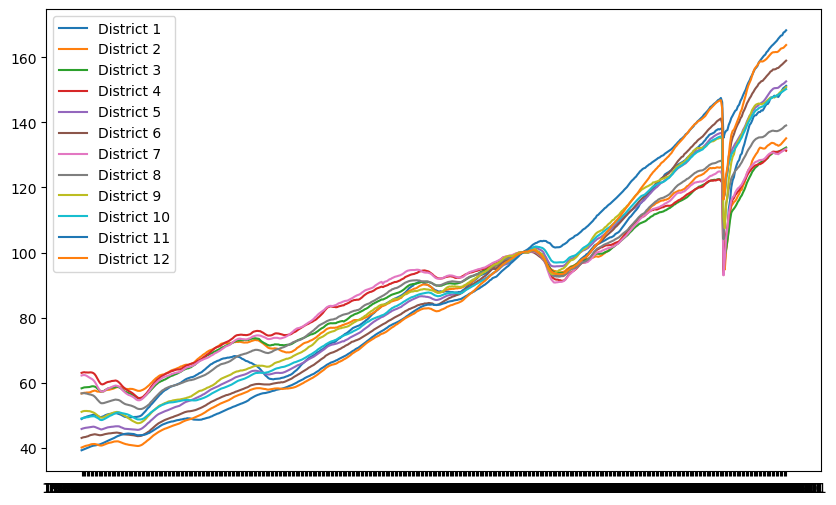

In [6]:
# Plot the coincident index for each column
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 6))

for column in coincident_index.columns[1:]:
    ax.plot(coincident_index['Date'], coincident_index[column], label=column)
    # add a legend
    ax.legend(loc='upper left')


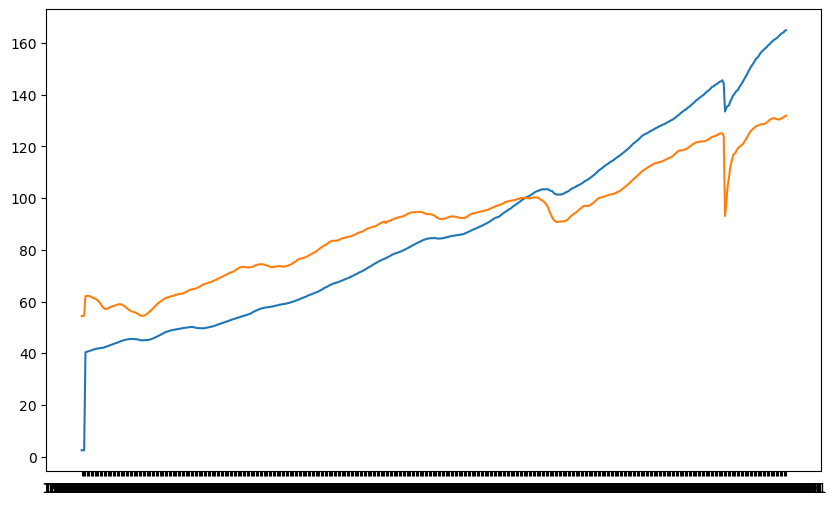

In [4]:
# Plot highest-growing district since 2000 versus lowest-growing district since baseline year
# Highest-growing district since 2000 is District 11
# Lowest-growing district since 2000 is District 7
# Plot the coincident index for each district
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(coincident_index['Date'], coincident_index['District 11'], label='District 11')
ax.plot(coincident_index['Date'], coincident_index['District 7'], label='District 7')

In [5]:
coincident_index.describe()

,District 1,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,88.754902,88.994839,88.758518,90.358787,87.541740,86.787185,90.317538,89.397968,89.313656,88.282546,87.885271,86.281157
std,27.452806,21.761437,20.728344,20.371795,29.619832,31.225248,20.928922,23.528117,28.545985,28.233232,35.281808,34.596529
min,48.349741,56.019132,55.042872,54.992263,32.420651,43.691086,54.340766,52.391366,46.662937,30.233859,2.485638,34.979473
25%,65.451062,71.322920,71.778331,74.412092,63.040493,60.235481,73.484220,69.783882,64.945122,63.784890,56.797045,58.148314
50%,88.192045,88.742262,90.399313,92.217943,86.341216,84.739263,92.571152,91.168993,88.428404,87.670789,84.417548,82.617694
75%,103.547245,100.445295,100.435125,102.260827,106.409505,105.165817,101.051665,102.724060,108.151579,107.009112,113.880315,106.660548
max,150.790776,135.024545,132.298852,132.065701,151.642962,156.320222,131.871232,138.007984,150.427173,147.956169,164.916784,162.774531
